In [2]:
# Import Libraries
# Explanation: Load libraries for data processing, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation: Import scikit-learn tools for regression and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Explanation: Set plotting style
sns.set(style="whitegrid")


In [3]:
# Load Dataset
# Explanation: Load hydration-related session data
df = pd.read_csv("Garmin_run_data.csv")  # Replace with actual dataset path
df.head()


,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps
0,Running,7/15/20 9:41,Cherry Hill Running,6.00,530,0:43:55,141,160,176,182,7:19,6:20,169,173,1.26,00:02.3,7
1,Running,7/14/20 17:45,Cherry Hill Running,6.50,587,0:47:04,144,160,172,182,7:14,6:35,183,187,1.29,03:32.7,7
2,Running,7/13/20 18:57,Cherry Hill Running,5.01,392,0:40:29,128,151,170,180,8:05,5:49,124,124,1.17,00:04.1,6
3,Running,7/12/20 18:44,Cherry Hill Running,7.01,633,0:52:55,142,157,172,180,7:33,5:00,215,219,1.24,00:05.1,8
4,Running,7/11/20 19:35,Cherry Hill Running,5.19,419,0:41:35,129,143,170,178,8:01,6:48,76,80,1.18,01:27.1,6


In [4]:
# Step 3: Convert time (e.g., 0:43:55 or 03:32.7) to total minutes
# Explanation: Convert a time string to a float representing total minutes
def convert_to_minutes(time_str):
    try:
        parts = list(map(int, time_str.split(':')))
        if len(parts) == 3:
            return parts[0]*60 + parts[1] + parts[2]/60
        elif len(parts) == 2:
            return parts[0] + parts[1]/60
    except:
        return np.nan

# Explanation: Apply time conversion to new column
df['Time (min)'] = df['Time'].apply(convert_to_minutes)


In [5]:
# Step 4: Convert Avg Pace (e.g., 7:19) to seconds per km
# Explanation: Convert pace string to total seconds per km
def pace_to_seconds(pace_str):
    try:
        minutes, seconds = map(int, pace_str.split(':'))
        return minutes * 60 + seconds
    except:
        return np.nan

# Explanation: Apply pace conversion
df['Avg Pace (sec)'] = df['Avg Pace'].apply(pace_to_seconds)


In [6]:
# Step 5: Clean numeric columns
# Explanation: Convert columns to numeric and handle errors
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
df['Avg HR'] = pd.to_numeric(df['Avg HR'], errors='coerce')
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')


In [14]:
# Step 6: Create synthetic hydration target using simple sports science logic
# Explanation: Estimate hydration need in mL/hr based on calories and heart rate
df['Hydration Need (mL/hr)'] = 400 + 0.5 * df['Calories'] + 0.2 * df['Avg HR']


In [15]:
# Step 7: Drop missing values
# Explanation: Remove any rows with NaN after all conversions
df = df.dropna()

In [17]:
# Step 8: Create feature matrix and target
# Explanation: Select only the columns that actually exist in your dataset
X = df[['Avg HR', 'Time (min)', 'Avg Pace (sec)', 'Calories']]

# Explanation: Select target hydration need column
y = df['Hydration Need (mL/hr)']


In [18]:
# Step 9: Split dataset
# Explanation: Use 80% of data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Step 10: Train model
# Explanation: Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Step 11: Evaluate model
# Explanation: Generate predictions and compute evaluation metrics
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.00
MSE: 0.00
RMSE: 0.00
R² Score: 1.00


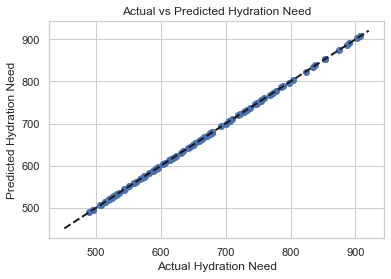

In [21]:
# Step 12: Visualize predictions vs actual
# Explanation: Compare predicted vs actual hydration needs
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Hydration Need")
plt.ylabel("Predicted Hydration Need")
plt.title("Actual vs Predicted Hydration Need")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()
